<a href="https://colab.research.google.com/github/Dusein/MachineLearningTask/blob/main/7thWeekTask/XGBoost_For_tugasxgboost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd

# Ganti 'your_file_path' dengan path sebenarnya ke file CSV Anda di Google Drive
file_path = '/content/drive/My Drive/Dataset/tugasxgboost.csv'

# Membaca file CSV ke dalam DataFrame
df = pd.read_csv(file_path)

# Menampilkan beberapa baris pertama dari DataFrame
print(df.head())


     X1    X2    X3   X4    X5    X6    X7        X8    X9   X10  X11  Class
0   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4      5
1   7.8  0.88  0.00  2.6  98.0  25.0  67.0    0.9968  3.20  0.68  9.8      5
2   7.8  0.76  0.04  2.3  92.0  15.0  54.0  997.0000  3.26  0.65  9.8      5
3  11.2  0.28  0.56  1.9  75.0  17.0  60.0  998.0000  3.16  0.58  9.8      6
4   7.4  0.70  0.00  1.9  76.0  11.0  34.0    0.9978  3.51  0.56  9.4      5


In [3]:
# Memilih subset dari prediktor
predictors = ['X1', 'X2', 'X4', 'X9', 'X11']

# Menentukan target variabel
target = 'Class'

# Membuat DataFrame untuk prediktor
X = df[predictors]

# Membuat Series untuk target
y = df[target]

# Menampilkan beberapa baris pertama dari prediktor dan target
print("Predictors (X):")
print(X.head())

print("\nTarget (y):")
print(y.head())

Predictors (X):
     X1    X2   X4    X9  X11
0   7.4  0.70  1.9  3.51  9.4
1   7.8  0.88  2.6  3.20  9.8
2   7.8  0.76  2.3  3.26  9.8
3  11.2  0.28  1.9  3.16  9.8
4   7.4  0.70  1.9  3.51  9.4

Target (y):
0    5
1    5
2    5
3    6
4    5
Name: Class, dtype: int64


In [4]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi data latih dan data validasi
X_train, X_valid, y_train, y_valid = train_test_split(X, y, test_size=0.2, random_state=42)

# Menampilkan ukuran dataset hasil pemisahan
print("Ukuran data latih (X_train):", X_train.shape)
print("Ukuran data validasi (X_valid):", X_valid.shape)
print("Ukuran target latih (y_train):", y_train.shape)
print("Ukuran target validasi (y_valid):", y_valid.shape)

Ukuran data latih (X_train): (1279, 5)
Ukuran data validasi (X_valid): (320, 5)
Ukuran target latih (y_train): (1279,)
Ukuran target validasi (y_valid): (320,)


In [5]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error

# Membuat model XGBoost
model = XGBRegressor(random_state=42)

# Melatih model pada data latih
model.fit(X_train, y_train)

# Membuat prediksi pada data validasi
y_pred = model.predict(X_valid)

# Menghitung Mean Absolute Error (MAE)
mae = mean_absolute_error(y_valid, y_pred)

# Menampilkan MAE
print("Mean Absolute Error pada data validasi:", mae)


Mean Absolute Error pada data validasi: 0.472926439344883


In [6]:
# Membuat model XGBoost dengan 500 estimators
model_500 = XGBRegressor(n_estimators=500, random_state=42)

# Melatih model pada data latih
model_500.fit(X_train, y_train)

# Membuat prediksi pada data validasi
y_pred_500 = model_500.predict(X_valid)

# Menghitung Mean Absolute Error (MAE)
mae_500 = mean_absolute_error(y_valid, y_pred_500)

# Menampilkan MAE
print("Mean Absolute Error pada data validasi dengan 500 estimators:", mae_500)


Mean Absolute Error pada data validasi dengan 500 estimators: 0.46431212276220324


In [7]:
import xgboost as xgb
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")


Mean Absolute Error pada Set Validasi: 0.5048610866069794


Mean Absolute Error pada Set Validasi: 0.5048610866069794


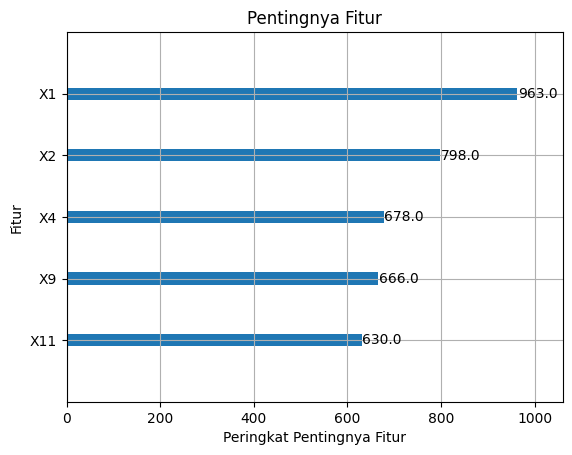

In [8]:
import xgboost as xgb
import matplotlib.pyplot as plt
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split

# Inisialisasi XGBRegressor dengan learning rate kustom
model = xgb.XGBRegressor(
    learning_rate=0.05,  # Learning rate kustom
    n_estimators=90,     # Jumlah estimator
    early_stopping_rounds=10,  # Early stopping
    objective='reg:squarederror',  # Tujuan untuk regresi
    eval_metric='mae'  # Menggunakan mean absolute error sebagai metrik evaluasi
)

# Melatih model dengan data pelatihan dan set validasi untuk early stopping
model.fit(
    X_train, y_train,
    eval_set=[(X_valid, y_valid)],
    verbose=False
)

# Membuat prediksi pada set validasi
y_pred = model.predict(X_valid)

# Menghitung dan mencetak Mean Absolute Error pada set validasi
mae = mean_absolute_error(y_valid, y_pred)
print(f"Mean Absolute Error pada Set Validasi: {mae}")

# Visualisasi Feature Importance
# Menampilkan plot importansi fitur
xgb.plot_importance(model,
                    importance_type='weight',  # Bisa diganti dengan 'weight', 'gain', atau 'cover'
                    max_num_features=10,       # Maksimal 10 fitur yang akan ditampilkan
                    title='Pentingnya Fitur',  # Judul grafik
                    xlabel='Peringkat Pentingnya Fitur',  # Label sumbu X
                    ylabel='Fitur')  # Label sumbu Y
plt.show()


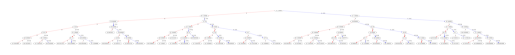

In [9]:
import xgboost as xgb
import matplotlib.pyplot as plt

# Visualisasi Struktur Pohon (Tree)
# Menampilkan pohon pertama dari model
xgb.plot_tree(model, num_trees=0)  # num_trees=0 untuk pohon pertama (0-based index)
plt.show()

{'validation_0': OrderedDict([('mae', [0.671725471317768, 0.6602132245898247, 0.6494858413934708, 0.6377892568707466, 0.6286503046751022, 0.618553863465786, 0.6095404610037803, 0.6005158722400665, 0.592631159722805, 0.5871928468346596, 0.5833384528756141, 0.5782195448875427, 0.5743290051817894, 0.5700654804706573, 0.5661525562405586, 0.5623496636748314, 0.5589659631252288, 0.5567527517676354, 0.5545479923486709, 0.5518784537911415, 0.5494783386588097, 0.5481019034981728, 0.5461823076009751, 0.5450096249580383, 0.5439932152628899, 0.5416423857212067, 0.5399723798036575, 0.5393017202615737, 0.537886856496334, 0.535677744448185, 0.5345010370016098, 0.5337218910455703, 0.5331736251711845, 0.5325997039675713, 0.5304767370224, 0.5293608352541923, 0.5285098508000374, 0.5270894706249237, 0.5252073287963868, 0.5240175187587738, 0.5231570675969124, 0.5220170393586159, 0.5216287702322007, 0.5209274590015411, 0.5202967718243598, 0.5204206287860871, 0.5206622242927551, 0.5202373102307319, 0.5207969

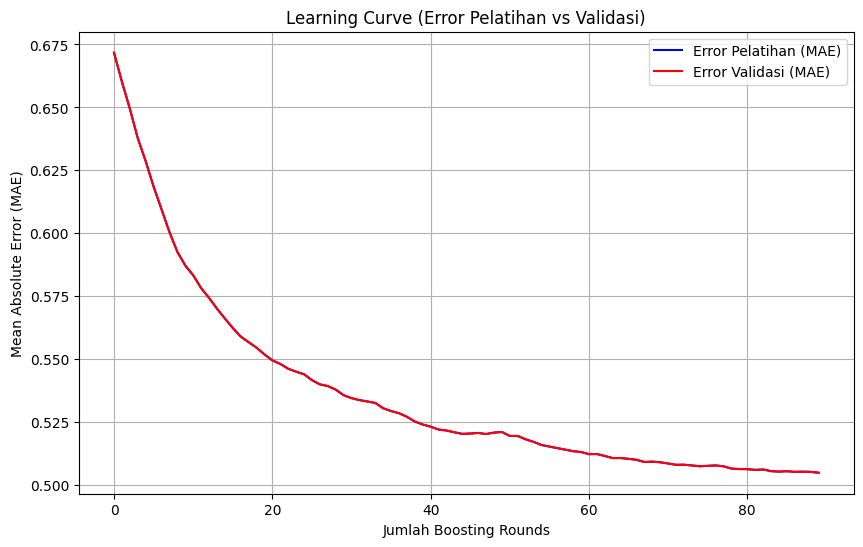

In [10]:
import matplotlib.pyplot as plt

# Mengakses hasil evaluasi
evals_result = model.evals_result()

# Menampilkan hasil evaluasi untuk memeriksa struktur
print(evals_result)  # Ini akan membantu Anda mengetahui struktur dictionary

# Misalnya, jika hanya ada 'validation_0', Anda dapat menggunakan:
train_error = evals_result['validation_0']['mae']  # MAE untuk pelatihan
valid_error = evals_result['validation_0']['mae']  # MAE untuk validasi (gunakan yang sama jika hanya satu set evaluasi)

# Membuat plot Learning Curve (Error pelatihan vs Validasi)
plt.figure(figsize=(10, 6))
plt.plot(train_error, label='Error Pelatihan (MAE)', color='blue')
plt.plot(valid_error, label='Error Validasi (MAE)', color='red')
plt.xlabel('Jumlah Boosting Rounds')
plt.ylabel('Mean Absolute Error (MAE)')
plt.title('Learning Curve (Error Pelatihan vs Validasi)')
plt.legend()
plt.grid(True)
plt.show()


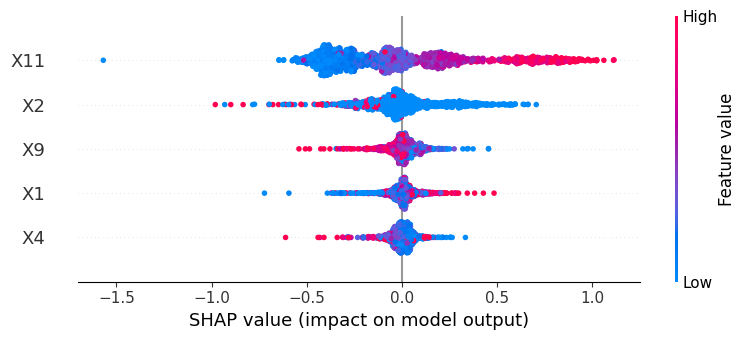

In [11]:
import shap
import xgboost as xgb
import matplotlib.pyplot as plt

# Jika model XGBoost sudah dilatih, lanjutkan di bawah ini
# Pastikan untuk mengganti 'model' dengan model yang sudah dilatih

# Menghitung SHAP values untuk data pelatihan
explainer = shap.Explainer(model)  # Membuat objek explainer untuk model XGBoost
shap_values = explainer(X_train)  # Menghitung SHAP values untuk data pelatihan

# Visualisasi SHAP summary plot
shap.summary_plot(shap_values, X_train)


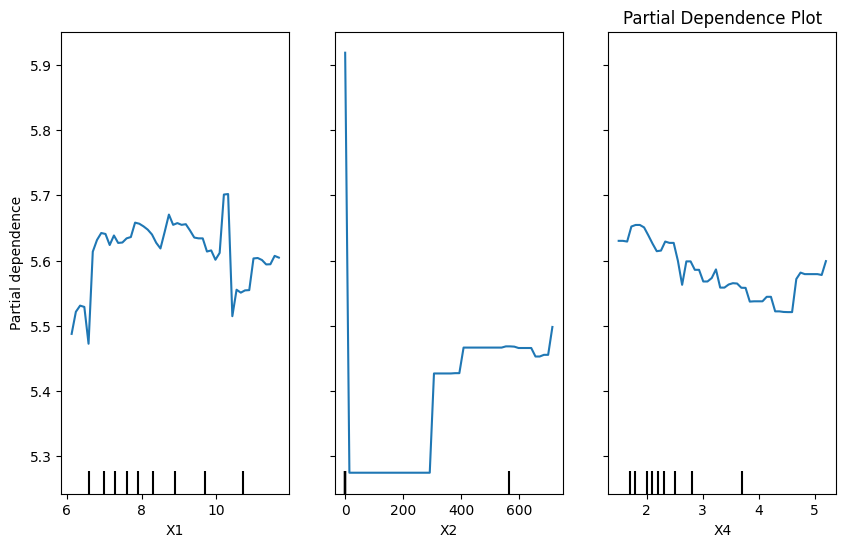

In [13]:
from sklearn.inspection import PartialDependenceDisplay
import matplotlib.pyplot as plt

# Misalkan model Anda adalah model yang sudah dilatih
# X_train adalah data fitur pelatihan Anda

# Membuat Partial Dependence Plot untuk fitur tertentu (misalnya, 'Rooms', 'Distance', dll)
features = ['X1', 'X2', 'X4']  # List of features

# Membuat plot
fig, ax = plt.subplots(figsize=(10, 6))  # Ukuran plot

# Membuat Partial Dependence Plot untuk fitur yang dipilih
PartialDependenceDisplay.from_estimator(model, X_train, features=features, ax=ax, grid_resolution=50)

# Menampilkan plot
plt.title("Partial Dependence Plot")
plt.show()
